# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_clubs_overview = pd.read_pickle("./df_clubs_overview.pkl")
df_matchday_data = pd.read_pickle("./df_matchday_data.pkl")
df_transfer_data = pd.read_pickle("./df_transfer_data.pkl")

# Clubs data

In [3]:
df_clubs_overview 

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,FC Schalke 04,19,"24,8",0,-,-,1963
1,Preußen Münster,19,"25,7",0,-,-,1963
2,1.FC Saarbrücken,18,"24,5",0,-,-,1963
3,Hamburger SV,22,"25,4",0,-,-,1963
4,1.FC Kaiserslautern,19,"25,0",1,-,-,1963
...,...,...,...,...,...,...,...
13,1.FC Köln,39,"24,9",15,"2,97 Mio. €","115,65 Mio. €",2022
14,Hertha BSC,41,"25,4",21,"2,29 Mio. €","94,00 Mio. €",2022
15,SV Werder Bremen,33,"24,7",10,"2,71 Mio. €","89,50 Mio. €",2022
16,FC Schalke 04,43,"26,4",22,"2,04 Mio. €","87,78 Mio. €",2022


In [4]:
df_clubs = df_clubs_overview.loc[~df_clubs_overview.apply(lambda row: row.astype(str).str.contains('-').any(), axis=1)]

In [5]:
df_clubs

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,FC Bayern München,29,"27,6",14,"6,04 Mio. €","175,30 Mio. €",2004
1,SV Werder Bremen,29,"25,0",14,"3,40 Mio. €","98,48 Mio. €",2004
2,Bayer 04 Leverkusen,32,"24,8",15,"2,72 Mio. €","86,93 Mio. €",2004
3,FC Schalke 04,33,"25,6",15,"2,62 Mio. €","86,33 Mio. €",2004
4,VfB Stuttgart,31,"25,5",14,"2,56 Mio. €","79,50 Mio. €",2004
...,...,...,...,...,...,...,...
13,1.FC Köln,39,"24,9",15,"2,97 Mio. €","115,65 Mio. €",2022
14,Hertha BSC,41,"25,4",21,"2,29 Mio. €","94,00 Mio. €",2022
15,SV Werder Bremen,33,"24,7",10,"2,71 Mio. €","89,50 Mio. €",2022
16,FC Schalke 04,43,"26,4",22,"2,04 Mio. €","87,78 Mio. €",2022


## Group club infos by club

In [6]:
df_clubs_grp_clubs = df_clubs.groupby('CLUB_NAME')
club_names_clubs = df_clubs['CLUB_NAME'].unique().tolist()
print(f'clubs: {len(club_names_clubs)}')

clubs: 35


In [7]:
dict_clubs_clubs = {}
for club_name, group_df in df_clubs_grp_clubs:
    dict_clubs_clubs[club_name] = group_df.reset_index(drop=True)

In [8]:
dict_clubs_clubs[club_names_clubs[0]]

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,FC Bayern München,29,"27,6",14,"6,04 Mio. €","175,30 Mio. €",2004
1,FC Bayern München,28,"27,8",14,"6,35 Mio. €","177,88 Mio. €",2005
2,FC Bayern München,30,"26,5",16,"6,02 Mio. €","180,73 Mio. €",2006
3,FC Bayern München,31,"25,7",14,"8,04 Mio. €","249,20 Mio. €",2007
4,FC Bayern München,29,"26,2",14,"8,14 Mio. €","235,95 Mio. €",2008
5,FC Bayern München,29,"26,1",15,"9,64 Mio. €","279,55 Mio. €",2009
6,FC Bayern München,31,"25,7",17,"9,97 Mio. €","308,98 Mio. €",2010
7,FC Bayern München,25,"25,8",11,"14,24 Mio. €","356,00 Mio. €",2011
8,FC Bayern München,29,"25,3",13,"15,94 Mio. €","462,40 Mio. €",2012
9,FC Bayern München,33,"24,8",16,"16,88 Mio. €","556,88 Mio. €",2013


## Group club infos by season

In [9]:
df_clubs_grp_season = df_clubs.groupby('season')
season_names = df_clubs['season'].unique().tolist()

In [10]:
dict_clubs_season = {}
for season, group_df in df_clubs_grp_season:
    dict_clubs_season[season] = group_df.reset_index(drop=True)

In [11]:
dict_clubs_season[season_names[0]]

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,FC Bayern München,29,"27,6",14,"6,04 Mio. €","175,30 Mio. €",2004
1,SV Werder Bremen,29,"25,0",14,"3,40 Mio. €","98,48 Mio. €",2004
2,Bayer 04 Leverkusen,32,"24,8",15,"2,72 Mio. €","86,93 Mio. €",2004
3,FC Schalke 04,33,"25,6",15,"2,62 Mio. €","86,33 Mio. €",2004
4,VfB Stuttgart,31,"25,5",14,"2,56 Mio. €","79,50 Mio. €",2004
5,Borussia Dortmund,36,"24,5",18,"2,18 Mio. €","78,33 Mio. €",2004
6,Hertha BSC,30,"26,3",14,"2,39 Mio. €","71,78 Mio. €",2004
7,Hamburger SV,31,"24,9",16,"2,12 Mio. €","65,60 Mio. €",2004
8,VfL Wolfsburg,28,"27,3",18,"2,12 Mio. €","59,30 Mio. €",2004
9,Borussia Mönchengladbach,37,"27,2",19,"1,38 Mio. €","50,93 Mio. €",2004


# Match data

In [12]:
df_matchday_data

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE
0,1963-08-24,5,8,1963,1,Hertha BSC,14,1.FC Nürnberg,9,NaN,NaN,NaN,1.0,1.0,DRAW,Rolf Seekamp
1,1963-08-24,5,8,1963,1,Werder Bremen,10,Bor. Dortmund,4,NaN,NaN,NaN,3.0,2.0,HOME_WIN,Alfred Ott
2,1963-08-24,5,8,1963,1,E. Frankfurt,2,1.FC K'lautern,12,NaN,NaN,NaN,1.0,1.0,DRAW,Johannes Malka
3,1963-08-24,5,8,1963,1,Karlsruher SC,13,Meidericher SV,3,NaN,NaN,NaN,1.0,4.0,AWAY_WIN,Walter Zimmermann
4,1963-08-24,5,8,1963,1,1860 München,7,E. Braunschweig,11,NaN,NaN,NaN,1.0,1.0,DRAW,Helmut Fritz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-27,5,5,2022,34,Bor. M'gladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck
5,2023-05-27,5,5,2022,34,E. Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin
6,2023-05-27,5,5,2022,34,VfL Wolfsburg,7,Hertha BSC,18,93.6,3.6,2.8,1.0,2.0,AWAY_WIN,Benjamin Cortus
7,2023-05-27,5,5,2022,34,VfL Bochum,16,B. Leverkusen,6,13.0,16.5,70.5,3.0,0.0,HOME_WIN,Tobias Welz


In [13]:
df_matchday_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18262 entries, 0 to 8
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             18262 non-null  datetime64[ns]
 1   WEEKDAY          18262 non-null  int64         
 2   MONTH            18262 non-null  int64         
 3   SEASON           18262 non-null  int64         
 4   MATCHDAY         18262 non-null  int64         
 5   HOME_TEAM        18262 non-null  object        
 6   PLACE_HOME_TEAM  18262 non-null  object        
 7   AWAY_TEAM        18262 non-null  object        
 8   PLACE_AWAY_TEAM  18262 non-null  object        
 9   WIN_PERC_HOME    4284 non-null   float64       
 10  REMIS_PERC       4284 non-null   float64       
 11  WIN_PERC_AWAY    4284 non-null   float64       
 12  HOME_GOALS       18262 non-null  float64       
 13  AWAY_GOALS       18262 non-null  float64       
 14  RESULT           18262 non-null  object   

In [14]:
df_matchday = df_matchday_data[df_matchday_data['SEASON'] >= 2004]

In [15]:
df_matchday

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann
1,2004-08-07,5,8,2004,1,1.FC K'lautern,12,1.FC Nürnberg,14,NaN,NaN,NaN,1.0,3.0,AWAY_WIN,Michael Weiner
2,2004-08-07,5,8,2004,1,SC Freiburg,18,Hansa Rostock,17,NaN,NaN,NaN,0.0,0.0,DRAW,Dr. Helmut Fleischer
3,2004-08-07,5,8,2004,1,Bor. Dortmund,7,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Wolfgang Stark
4,2004-08-07,5,8,2004,1,B. Leverkusen,6,Hannover 96,10,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-27,5,5,2022,34,Bor. M'gladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck
5,2023-05-27,5,5,2022,34,E. Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin
6,2023-05-27,5,5,2022,34,VfL Wolfsburg,7,Hertha BSC,18,93.6,3.6,2.8,1.0,2.0,AWAY_WIN,Benjamin Cortus
7,2023-05-27,5,5,2022,34,VfL Bochum,16,B. Leverkusen,6,13.0,16.5,70.5,3.0,0.0,HOME_WIN,Tobias Welz


## Group Match data by season

In [16]:
grouped_by_season = df_matchday.groupby('SEASON')
season_names = df_matchday['SEASON'].unique().tolist()

In [17]:
dict_match_season = {}
for season, group_df in grouped_by_season:
    dict_match_season[season] = group_df.reset_index(drop=True)

In [18]:
dict_match_season[season_names[0]]

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann
1,2004-08-07,5,8,2004,1,1.FC K'lautern,12,1.FC Nürnberg,14,NaN,NaN,NaN,1.0,3.0,AWAY_WIN,Michael Weiner
2,2004-08-07,5,8,2004,1,SC Freiburg,18,Hansa Rostock,17,NaN,NaN,NaN,0.0,0.0,DRAW,Dr. Helmut Fleischer
3,2004-08-07,5,8,2004,1,Bor. Dortmund,7,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Wolfgang Stark
4,2004-08-07,5,8,2004,1,B. Leverkusen,6,Hannover 96,10,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2005-05-21,5,5,2004,34,B. Leverkusen,6,Bor. M'gladbach,15,NaN,NaN,NaN,5.0,1.0,HOME_WIN,Thorsten Kinhöfer
302,2005-05-21,5,5,2004,34,Arm. Bielefeld,13,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Lutz-Michael Fröhlich
303,2005-05-21,5,5,2004,34,Bor. Dortmund,7,Hansa Rostock,17,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Uwe Kemmling
304,2005-05-21,5,5,2004,34,SC Freiburg,18,FC Schalke 04,2,NaN,NaN,NaN,2.0,3.0,AWAY_WIN,Michael Weiner


## Group Match data by season and home team

In [19]:
grouped_by_home_team= df_matchday.groupby('SEASON')
season_names = df_matchday['SEASON'].unique().tolist()

## Group Match data by season and away team

## Group Match data by referee

In [20]:
grouped_by_ref = df_matchday.groupby('REFEREE')
ref_names = df_matchday['REFEREE'].unique().tolist()
print(f'Number of referees: {len(ref_names)}')

Number of referees: 57


In [21]:
dict_of_refs = {}

for ref_name, group_df in grouped_by_ref:
    dict_of_refs[ref_name] = group_df.reset_index(drop=True)

In [22]:
dict_of_refs[ref_names[0]]

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann
1,2004-09-11,5,9,2004,4,1.FC Nürnberg,7,Hertha BSC,13,NaN,NaN,NaN,0.0,0.0,DRAW,Stefan Trautmann
2,2004-10-03,6,10,2004,7,Arm. Bielefeld,6,VfB Stuttgart,2,NaN,NaN,NaN,0.0,2.0,AWAY_WIN,Stefan Trautmann
3,2004-10-26,1,10,2004,10,Bayern München,3,VfL Wolfsburg,1,NaN,NaN,NaN,2.0,0.0,HOME_WIN,Stefan Trautmann
4,2004-11-07,6,11,2004,12,Hamburger SV,13,FC Schalke 04,2,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Stefan Trautmann
5,2004-11-13,5,11,2004,13,SC Freiburg,17,Arm. Bielefeld,9,NaN,NaN,NaN,2.0,3.0,AWAY_WIN,Stefan Trautmann
6,2004-11-27,5,11,2004,15,VfL Bochum,16,1.FC Nürnberg,12,NaN,NaN,NaN,3.0,1.0,HOME_WIN,Stefan Trautmann
7,2004-12-11,5,12,2004,17,Hannover 96,4,Hertha BSC,7,NaN,NaN,NaN,0.0,1.0,AWAY_WIN,Stefan Trautmann
8,2005-01-29,5,1,2004,19,1.FC K'lautern,10,FC Schalke 04,2,NaN,NaN,NaN,2.0,0.0,HOME_WIN,Stefan Trautmann
9,2005-02-05,5,2,2004,20,VfL Bochum,16,Arm. Bielefeld,12,NaN,NaN,NaN,1.0,1.0,DRAW,Stefan Trautmann


### Number of games per referee and team

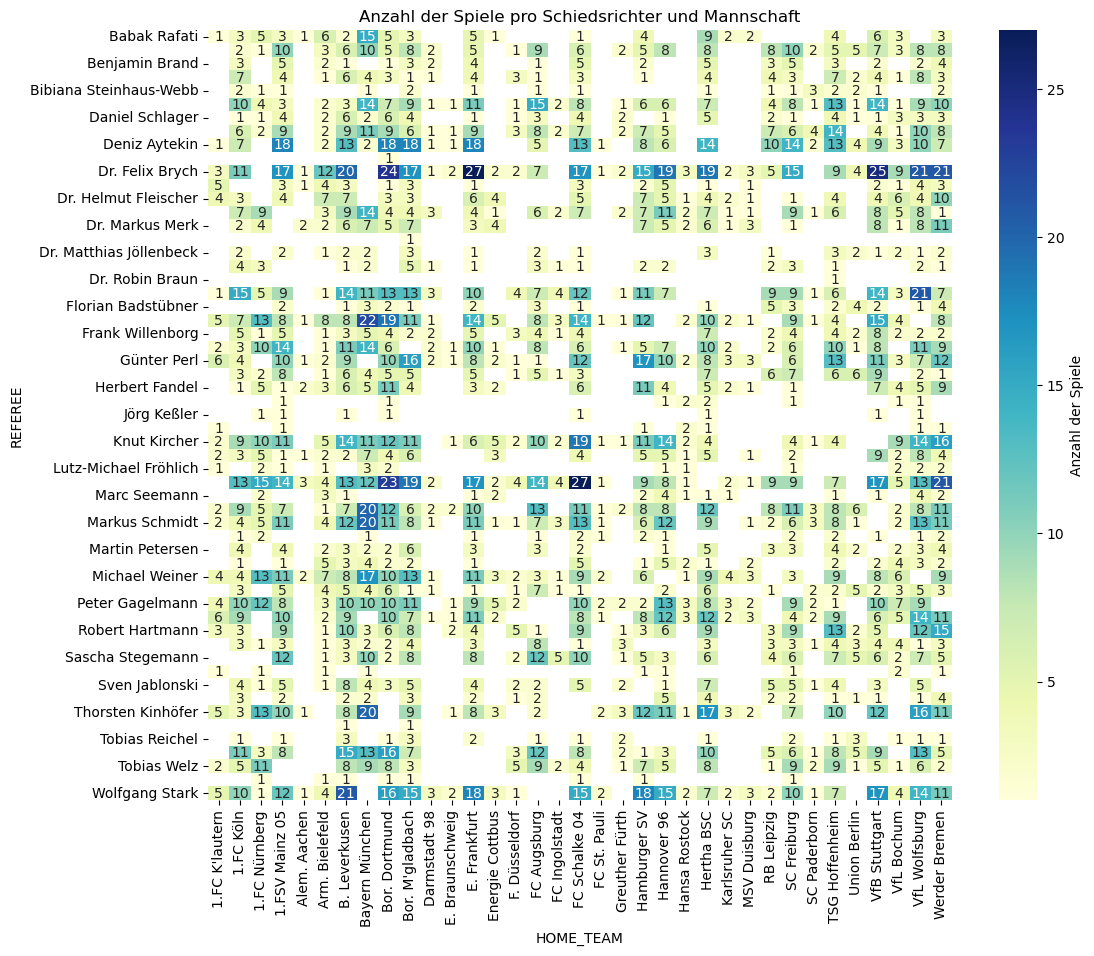

In [23]:
# Die Werte in der Pivot-Tabelle repräsentieren die Anzahl der Spiele, die von einem bestimmten Schiedsrichter für eine bestimmte Mannschaft gepfiffen wurden
pivot_table = df_matchday.pivot_table(index='REFEREE', columns='HOME_TEAM', values='DATE', aggfunc='count')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Anzahl der Spiele'})
plt.title("Anzahl der Spiele pro Schiedsrichter und Mannschaft")
plt.show()

### Average results by team and referee

In [24]:
# Markiere die Ergebnisse für 1 Heimsieg, - 1 Auswärtssieg (verloren) und 0 für unentschieden
df_matchday = df_matchday.copy()
df_matchday['RESULT_VALUE'] = np.where(df_matchday['HOME_GOALS'] > df_matchday['AWAY_GOALS'], 1,  # Heimsieg
                                      np.where(df_matchday['HOME_GOALS'] < df_matchday['AWAY_GOALS'], -1, 0))  # Auswärtssieg bzw. Unentschieden


In [25]:
home_results = df_matchday.groupby(['HOME_TEAM', 'REFEREE'])['RESULT_VALUE'].mean().reset_index().rename(columns={'HOME_TEAM': 'TEAM'})
away_results = df_matchday.groupby(['AWAY_TEAM', 'REFEREE'])['RESULT_VALUE'].mean().reset_index().rename(columns={'AWAY_TEAM': 'TEAM'})

combined_results = pd.concat([home_results, away_results])

In [26]:
pivot_df = combined_results.pivot_table(index='TEAM', columns='REFEREE', values='RESULT_VALUE', aggfunc='mean').fillna(0)

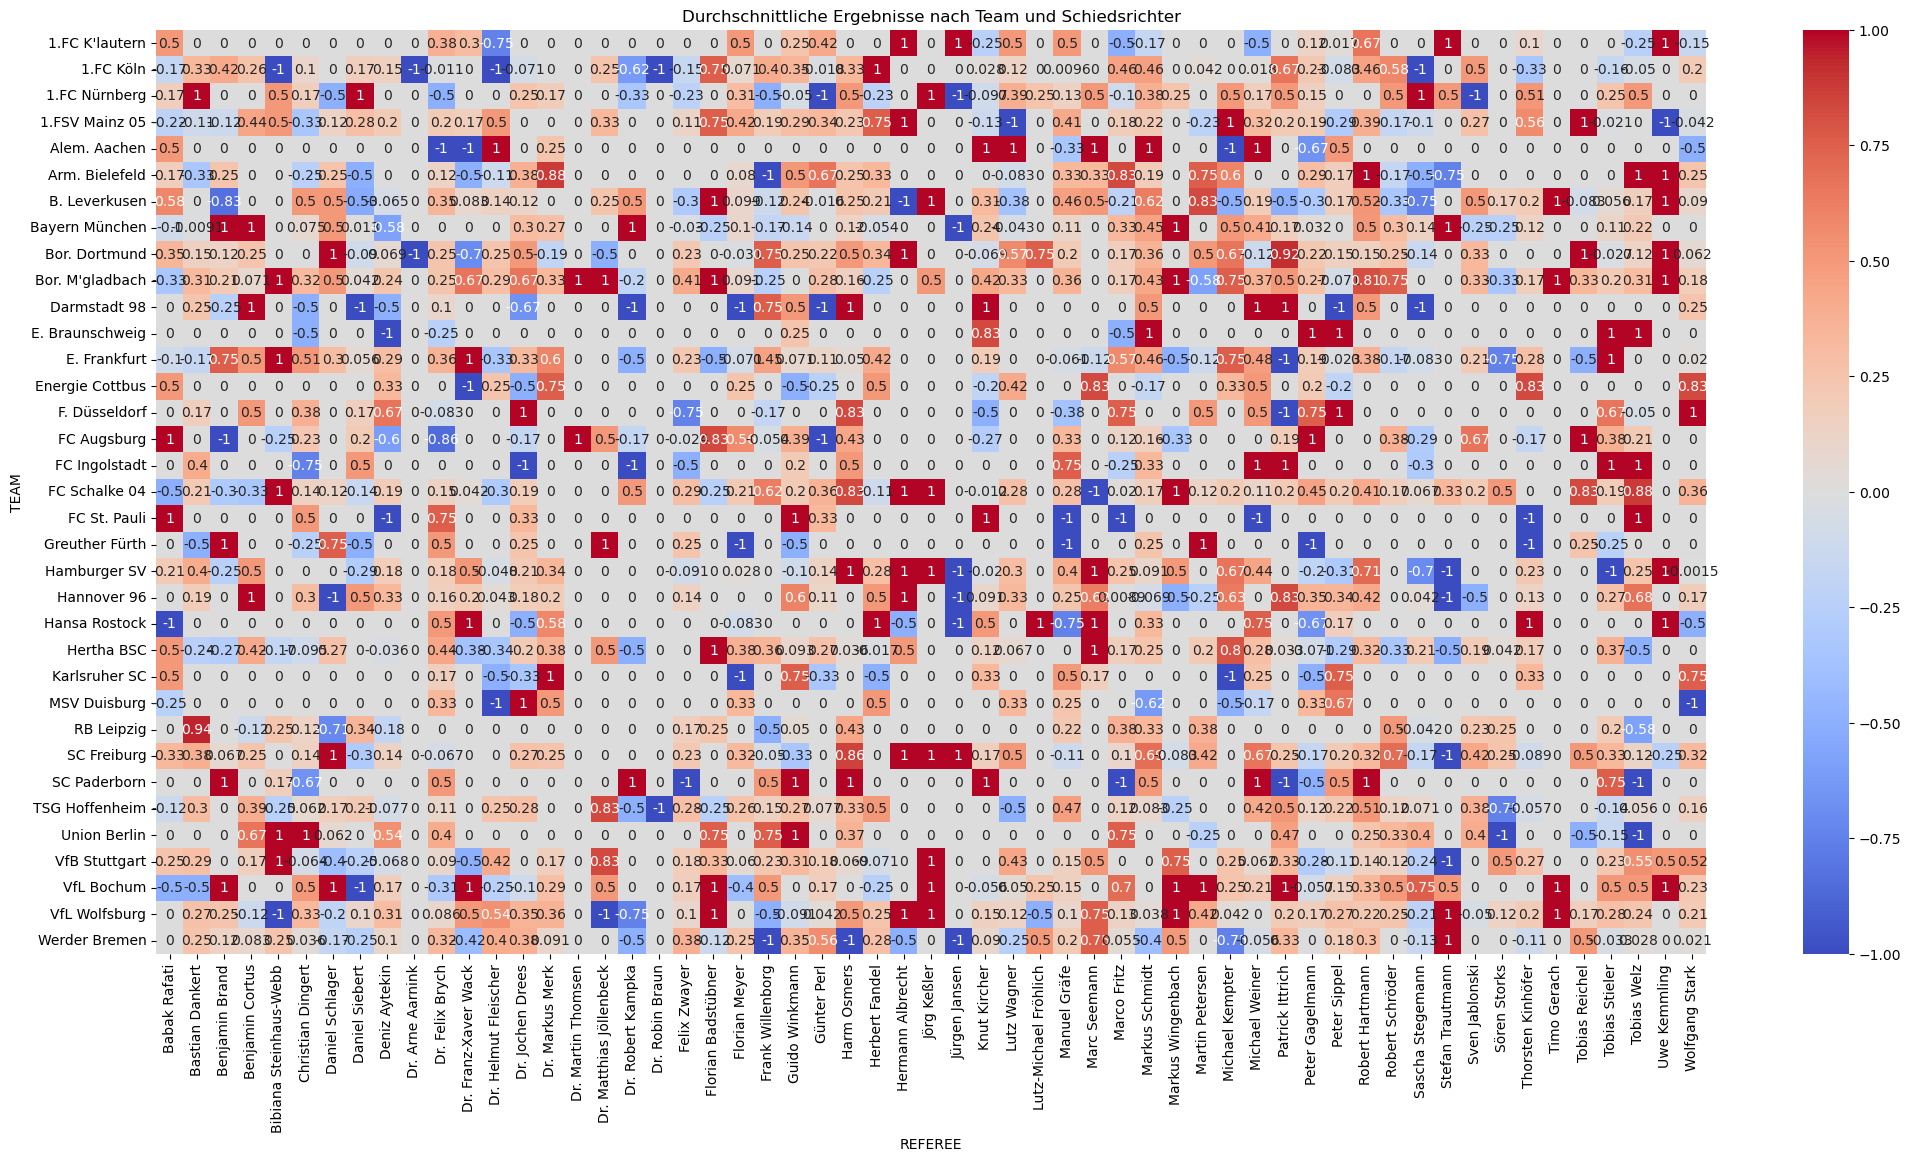

In [27]:
plt.figure(figsize=(25, 12))
sns.heatmap(pivot_df, cmap="coolwarm", center=0, annot=True)
plt.title('Durchschnittliche Ergebnisse nach Team und Schiedsrichter')
plt.show()

## Include Typing Trends in Analysis

In [28]:
df_matchday_no_na = df_matchday.dropna()

In [29]:
def predict_result(row):
    # if row['WIN_PERC_HOME'] > 50:
    #     return 'HOME_WIN'
    # elif row['WIN_PERC_AWAY'] > 50:
    #     return 'AWAY_WIN'
    # elif row['REMIS_PERC'] > 50:
    #     return 'DRAW'
    # else:
    # Wenn keine der Schwellenwerte erfüllt ist, nimm den höchsten Prozentsatz
    max_value = max(row['WIN_PERC_HOME'], row['WIN_PERC_AWAY'], row['REMIS_PERC'])
    if max_value == row['WIN_PERC_HOME']:
        return 'HOME_WIN'
    elif max_value == row['WIN_PERC_AWAY']:
        return 'AWAY_WIN'
    else:
        return 'DRAW'

df_matchday['PREDICTED_RESULT'] = df_matchday.apply(predict_result, axis=1)
df_matchday['CORRECT_PREDICTION'] = df_matchday['PREDICTED_RESULT'] == df_matchday['RESULT']

In [30]:
# Für Heimsiege
home_predictions = df_matchday[df_matchday['PREDICTED_RESULT'] == 'HOME_WIN']
correct_home_predictions = home_predictions[home_predictions['CORRECT_PREDICTION']].shape[0]
home_accuracy = (correct_home_predictions / home_predictions.shape[0]) * 100

# Für Unentschieden
draw_predictions = df_matchday[df_matchday['PREDICTED_RESULT'] == 'DRAW']
correct_draw_predictions = draw_predictions[draw_predictions['CORRECT_PREDICTION']].shape[0]
draw_accuracy = (correct_draw_predictions / draw_predictions.shape[0]) * 100

# Für Auswärtssiege
away_predictions = df_matchday[df_matchday['PREDICTED_RESULT'] == 'AWAY_WIN']
correct_away_predictions = away_predictions[away_predictions['CORRECT_PREDICTION']].shape[0]
away_accuracy = (correct_away_predictions / away_predictions.shape[0]) * 100

print(f'Accuracy for home win predictions: {home_accuracy:.2f}%')
print(f'Accuracy for draw predictions: {draw_accuracy:.2f}%')
print(f'Accuracy for away win predictions: {away_accuracy:.2f}%')


Accuracy for home win predictions: 54.23%
Accuracy for draw predictions: 25.84%
Accuracy for away win predictions: 46.90%


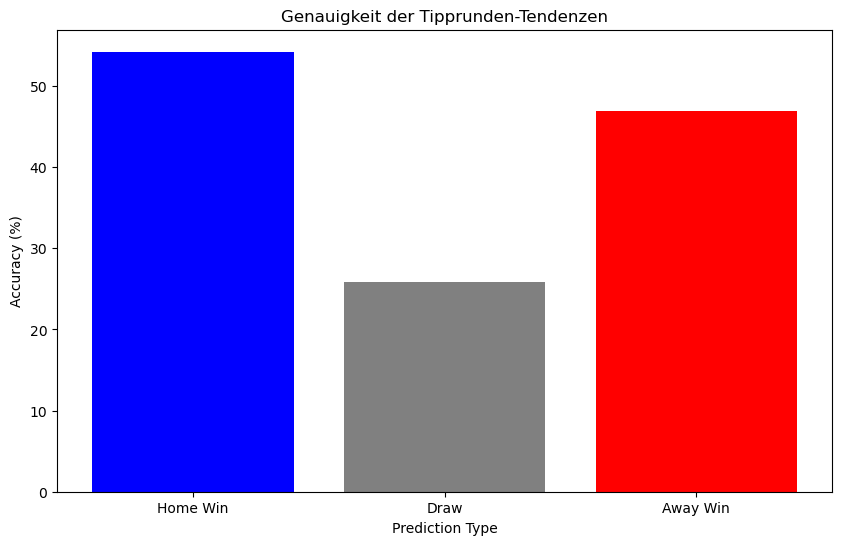

In [31]:
# Genauigkeitswerte
accuracies = [home_accuracy, draw_accuracy, away_accuracy]

# Bezeichnungen für die Balken
labels = ['Home Win', 'Draw', 'Away Win']

# Erstellen des Balkendiagramm
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'gray', 'red'])

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Genauigkeit der Tipprunden-Tendenzen')
plt.xlabel('Prediction Type')
plt.ylabel('Accuracy (%)')

plt.show()

## Group Match data by results

In [32]:
grouped_by_results = df_matchday.groupby('RESULT')
result_names = df_matchday['RESULT'].unique().tolist()

In [33]:
dict_of_results = {}

for result_name, group_df in grouped_by_results:
    dict_of_results[result_name] = group_df.reset_index(drop=True)

In [34]:
dict_of_results[result_names[0]]

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE,RESULT_VALUE,PREDICTED_RESULT,CORRECT_PREDICTION
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann,1,DRAW,False
1,2004-08-07,5,8,2004,1,B. Leverkusen,6,Hannover 96,10,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack,1,DRAW,False
2,2004-08-08,6,8,2004,1,VfB Stuttgart,5,1.FSV Mainz 05,11,NaN,NaN,NaN,4.0,2.0,HOME_WIN,Florian Meyer,1,DRAW,False
3,2004-08-14,5,8,2004,2,1.FSV Mainz 05,16,Hamburger SV,18,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Hermann Albrecht,1,DRAW,False
4,2004-08-14,5,8,2004,2,FC Schalke 04,15,1.FC K'lautern,17,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Peter Sippel,1,DRAW,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,2023-05-27,5,5,2022,34,RB Leipzig,3,FC Schalke 04,17,83.5,7.8,8.7,4.0,2.0,HOME_WIN,Harm Osmers,1,HOME_WIN,True
2627,2023-05-27,5,5,2022,34,Union Berlin,4,Werder Bremen,12,86.8,10.0,3.2,1.0,0.0,HOME_WIN,Patrick Ittrich,1,HOME_WIN,True
2628,2023-05-27,5,5,2022,34,Bor. M'gladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck,1,HOME_WIN,True
2629,2023-05-27,5,5,2022,34,E. Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin,1,DRAW,False


# Transfer data

In [35]:
df_transfer_data

,CLUB_NAME,AVG_AGE_JOINING,AVG_AGE_LEAVING,TOTAL_VALUE_JOINING_MIO,TOTAL_VALUE_LEAVING_MIO,EXPENSES_JOINING_MIO,REVENUE_LEAVING_MIO,season
0,1.FC Saarbrücken,22.8,25.2,,,,,1963
1,1.FC Kaiserslautern,22.8,24.2,,,0.06,,1963
2,1.FC Köln,18.0,24.3,,,,0.25,1963
3,1.FC Nürnberg,24.0,21.5,,,0.025,,1963
4,Borussia Dortmund,22.8,29.3,,,,0.115,1963
...,...,...,...,...,...,...,...,...
13,FC Augsburg,22.6,24.6,69.2,39.5,11.45,6.8,2022
14,VfB Stuttgart,22.8,22.8,72.75,99.9,14.99,52.6,2022
15,Hertha BSC,23.7,24.4,84.83,80.78,8.55,24.25,2022
16,FC Schalke 04,24.7,24.6,90.15,89.85,8.63,21.35,2022


In [36]:
df_transfer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 17
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CLUB_NAME                1078 non-null   object 
 1   AVG_AGE_JOINING          1078 non-null   float64
 2   AVG_AGE_LEAVING          1078 non-null   object 
 3   TOTAL_VALUE_JOINING_MIO  1078 non-null   object 
 4   TOTAL_VALUE_LEAVING_MIO  1078 non-null   object 
 5   EXPENSES_JOINING_MIO     1078 non-null   object 
 6   REVENUE_LEAVING_MIO      1078 non-null   object 
 7   season                   1078 non-null   object 
dtypes: float64(1), object(7)
memory usage: 75.8+ KB


In [38]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 0
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CLUB_NAME                60 non-null     object 
 1   AVG_AGE_JOINING          60 non-null     float64
 2   AVG_AGE_LEAVING          60 non-null     object 
 3   TOTAL_VALUE_JOINING_MIO  60 non-null     object 
 4   TOTAL_VALUE_LEAVING_MIO  60 non-null     object 
 5   EXPENSES_JOINING_MIO     60 non-null     object 
 6   REVENUE_LEAVING_MIO      60 non-null     object 
 7   season                   60 non-null     object 
dtypes: float64(1), object(7)
memory usage: 4.2+ KB


In [39]:
grouped_by_club = df_transfer_data.groupby('CLUB_NAME')
club_names = df_transfer_data['CLUB_NAME'].unique().tolist()

In [40]:
dict_of_clubs = {}
for club_name, group_df in grouped_by_club:
    dict_of_clubs[club_name] = group_df.reset_index(drop=True)

In [41]:
# bayern_df = dict_of_clubs['FC Bayern München']
club_df = dict_of_clubs[club_names[4]]

In [42]:
club_df

,CLUB_NAME,AVG_AGE_JOINING,AVG_AGE_LEAVING,TOTAL_VALUE_JOINING_MIO,TOTAL_VALUE_LEAVING_MIO,EXPENSES_JOINING_MIO,REVENUE_LEAVING_MIO,season
0,Borussia Dortmund,22.8,29.3,,,,0.115,1963
1,Borussia Dortmund,22.0,28.0,,,,,1964
2,Borussia Dortmund,21.3,30.7,,,0.05,0.04,1965
3,Borussia Dortmund,22.8,25.5,,,,,1966
4,Borussia Dortmund,19.5,28.0,,,,0.065,1967
5,Borussia Dortmund,23.0,25.8,,,,,1968
6,Borussia Dortmund,22.2,25.9,,,0.05,0.089,1969
7,Borussia Dortmund,20.8,24.8,,,,0.05,1970
8,Borussia Dortmund,22.1,26.5,,,,,1971
9,Borussia Dortmund,25.9,25.7,,,0.765,,1976
